In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.dummy import DummyClassifier
from sklearn import metrics as met


In [2]:
mnist = fetch_openml("mnist_784",as_frame=False)

In [3]:
x,y = mnist.data ,mnist.target

print(x.shape)
print(y.shape)

(70000, 784)
(70000,)


In [4]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

y_train_5 = (y_train=="5")
y_test_5 = (y_test=="5")

In [5]:
sgd_class = SGDClassifier(random_state=42)
sgd_class.fit(x_train,y_train_5)

SGDClassifier(random_state=42)

In [6]:
print(sgd_class.predict([x[0]]))
print(y[0])

[ True]
5


In [7]:
print(cross_val_score(sgd_class,x_train,y_train_5,cv=3,scoring="accuracy"))

[0.95035 0.96035 0.9604 ]


In [8]:
# dummy_class = DummyClassifier()
# dummy_class.fit(x_train,y_train_5)
# print(any(dummy_class.predict(x_train)))

In [9]:
# print(cross_val_score(dummy_class,x_train,y_train_5,cv=3,scoring="accuracy"))

In [10]:
pred = cross_val_predict(sgd_class,x_train,y_train_5,cv=3)
print(pred[:10])
print(y[:10])

[ True False False False False False False False False False]
['5' '0' '4' '1' '9' '2' '1' '3' '1' '4']


In [11]:
con_mat = met.confusion_matrix(y_train_5,pred)
print(con_mat)

[[53892   687]
 [ 1891  3530]]


In [14]:
print(met.precision_score(y_train_5,pred))
print(met.recall_score(y_train_5,pred))

0.8370879772350012
0.6511713705958311


In [13]:
print(met.f1_score(y_train_5,pred))

0.7325171197343846


In [15]:
print(met.classification_report(y_train_5,pred))

              precision    recall  f1-score   support

       False       0.97      0.99      0.98     54579
        True       0.84      0.65      0.73      5421

    accuracy                           0.96     60000
   macro avg       0.90      0.82      0.85     60000
weighted avg       0.95      0.96      0.95     60000



In [18]:
y_score = cross_val_predict(sgd_class,x_train,y_train_5,cv=3,method="decision_function")
print(y_score)


[  1200.93051237 -26883.79202424 -33072.03475406 ...  13272.12718981
  -7258.47203373 -16877.50840447]


In [19]:
precision,recall,threshold = met.precision_recall_curve(y_train_5,y_score)

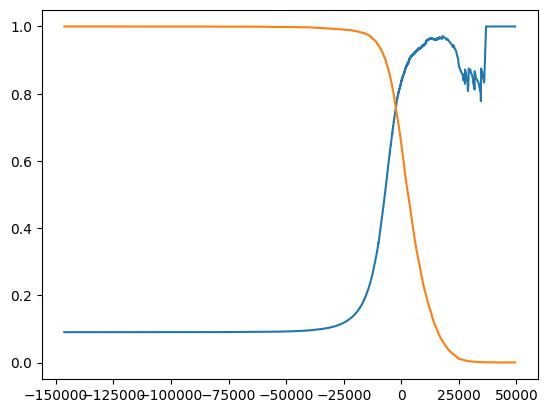

In [25]:
plt.plot(threshold,precision[:-1])
plt.plot(threshold,recall[:-1])

plt.show()